In [1]:
import pandas as pd
from LR_model import LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import numpy as np

# <10 features

In [2]:
# https://archive.ics.uci.edu/dataset/20/census+income
def get_data_adult():
    df = pd.read_csv('data/adult.data', header=None)
    X = df.iloc[:, [0, 2, 4, 10, 11, 12]]
    y = [1 if x == ' <=50K' else 0 for x in df.iloc[:, 14]]
    return X, y

In [3]:
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_raisin():
    df = pd.read_csv('data/Raisin_Dataset.arff', skiprows=18, header=None)
    X = df.iloc[:, :7]
    y = [1 if x=='Kecimen' else 0 for x in df.iloc[:, 7]]
    return X, y

In [4]:
# https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
def get_data_rice():
    df = pd.read_csv('data/Rice_Cammeo_Osmancik.arff', skiprows=16, header=None)
    X = df.iloc[:, :7]
    y = [1 if x=='Cammeo' else 0 for x in df.iloc[:, 7]]
    return X, y

# 3.5

In [5]:
datasets = {
    'adult': get_data_adult(),
    'raisin': get_data_raisin(),
    'rice': get_data_rice()
}
#adult, eeg, churn trudne zbiory

In [6]:
results = {
    'SGD': {},
    'IWLS': {},
    'ADAM': {},
    'SGD+INT': {},
    'IWLS+INT': {},
    'ADAM+INT': {}
}
n_splits = 5


for dataset in datasets:
    for r in np.random.randint(1, 10000, n_splits):
        X_train, X_test, y_train, y_test = train_test_split(datasets[dataset][0], datasets[dataset][1], test_size=0.2, random_state=r)
        for opt_algorithm in ['SGD', 'IWLS', 'ADAM']:
            model = LR(n_iterations=500, learning_rate=5e-5, tol = 1e-7)
            model.fit(X_train, y_train, optimization_algorithm=opt_algorithm, batch_size=64)
            if results[opt_algorithm].get(dataset) is None:
                results[opt_algorithm][dataset] = 0
            results[opt_algorithm][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

            #interactions
            print(opt_algorithm, dataset)
            model = LR(n_iterations=100, learning_rate=5e-5, tol = 1e-7, interaction_model=True)
            model.fit(X_train, y_train, optimization_algorithm=opt_algorithm, batch_size=64)
            if results[opt_algorithm+'+INT'].get(dataset) is None:
                results[opt_algorithm+'+INT'][dataset] = 0
            results[opt_algorithm+'+INT'][dataset] += balanced_accuracy_score(y_test, model.predict(X_test, True)) / n_splits

c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 10
IWLS adult
ADAM stopping at iteration 75
ADAM adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 51
SGD adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 362
IWLS adult
ADAM adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS adult
IWLS stopping at iteration 7
ADAM adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 74
SGD adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 469
IWLS adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


ADAM stopping at iteration 214
ADAM adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 138
SGD adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS adult
ADAM stopping at iteration 329
ADAM adult


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 156
SGD raisin
SGD stopping at iteration 6
IWLS stopping at iteration 6
IWLS raisin
IWLS stopping at iteration 68
ADAM stopping at iteration 117
ADAM raisin


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 6
SGD raisin


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 6
IWLS raisin
ADAM stopping at iteration 82
ADAM raisin


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 60
SGD raisin
SGD stopping at iteration 6
IWLS stopping at iteration 6
IWLS raisin


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 64
ADAM stopping at iteration 86
ADAM raisin


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 373
SGD raisin
SGD stopping at iteration 7
IWLS stopping at iteration 6
IWLS raisin
IWLS stopping at iteration 26
ADAM stopping at iteration 24
ADAM raisin


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 6
SGD raisin
SGD stopping at iteration 11
IWLS stopping at iteration 6
IWLS raisin
ADAM stopping at iteration 75
ADAM raisin


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 48
SGD rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 41
IWLS stopping at iteration 6
IWLS rice
IWLS stopping at iteration 6
ADAM stopping at iteration 162
ADAM rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 43
IWLS stopping at iteration 6
IWLS rice
IWLS stopping at iteration 6
ADAM stopping at iteration 206
ADAM rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 153
SGD rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 6
IWLS rice
IWLS stopping at iteration 6
ADAM stopping at iteration 7
ADAM rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 96
SGD rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 6
IWLS rice
IWLS stopping at iteration 6
ADAM stopping at iteration 205
ADAM rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

SGD stopping at iteration 440
SGD rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

IWLS stopping at iteration 6
IWLS rice
IWLS stopping at iteration 6
ADAM stopping at iteration 47
ADAM rice


c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

<Figure size 1152x864 with 0 Axes>

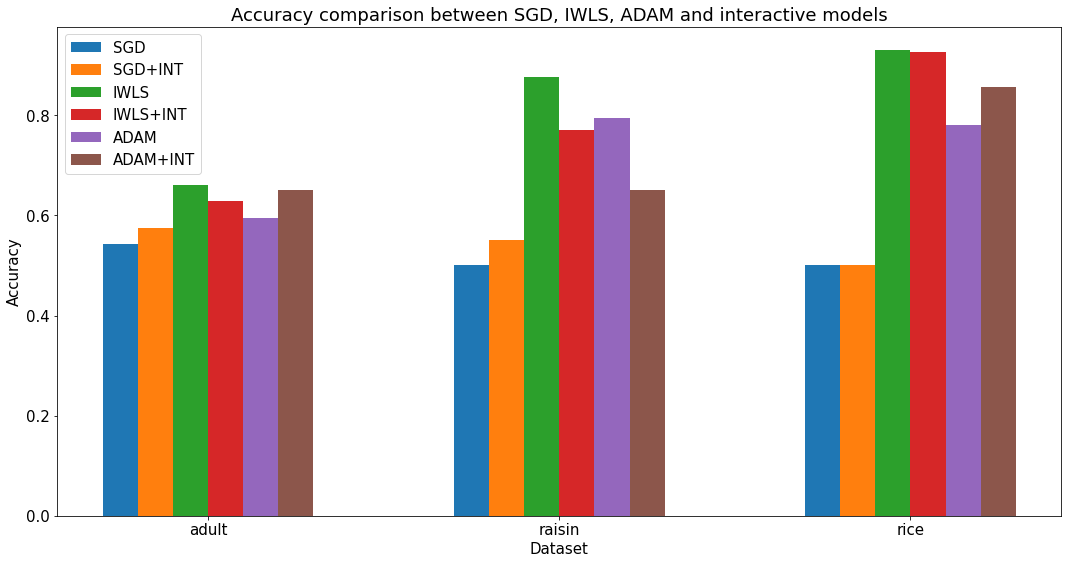

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize = (16, 12))
plt.rcParams['font.size'] = 15

labels = list(results['SGD'].keys())
SGD_values = list(results['SGD'].values())
IWLS_values = list(results['IWLS'].values())
ADAM_values = list(results['ADAM'].values())
SGDINT_values = list(results['SGD+INT'].values())
IWLSINT_values = list(results['IWLS+INT'].values())
ADAMINT_values = list(results['ADAM+INT'].values())

x = range(len(labels))

# Plotting
plt.figure(figsize=(18, 9))
bar_width = 0.1

plt.bar(x, SGD_values, width=bar_width, label='SGD')
plt.bar([i + bar_width for i in x], SGDINT_values, width=bar_width, label='SGD+INT')
plt.bar([i + bar_width*2 for i in x], IWLS_values, width=bar_width, label='IWLS')
plt.bar([i + bar_width*3 for i in x], IWLSINT_values, width=bar_width, label='IWLS+INT')
plt.bar([i + bar_width*4 for i in x], ADAM_values, width=bar_width, label='ADAM')
plt.bar([i + bar_width*5 for i in x], ADAMINT_values, width=bar_width, label='ADAM+INT')


plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison between SGD, IWLS, ADAM and interactive models')
plt.xticks([i + bar_width*2.5 for i in x], labels)
plt.legend()
plt.savefig('pictures/task3_5.jpg')
plt.show()